# Step 01: Import Data, Check for Null Values, Column Info, and Descriptive Statistics

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('tips.csv')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Check for null values
print(data.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [4]:
# Check column information
print(data.info())

<class 'pandas.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    str    
 3   smoker      244 non-null    str    
 4   day         244 non-null    str    
 5   time        244 non-null    str    
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), str(4)
memory usage: 13.5 KB
None


In [5]:
# Descriptive statistics
print(data.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


# Step 02: Tips According to Total Bill, Number of People, and Day of the Week

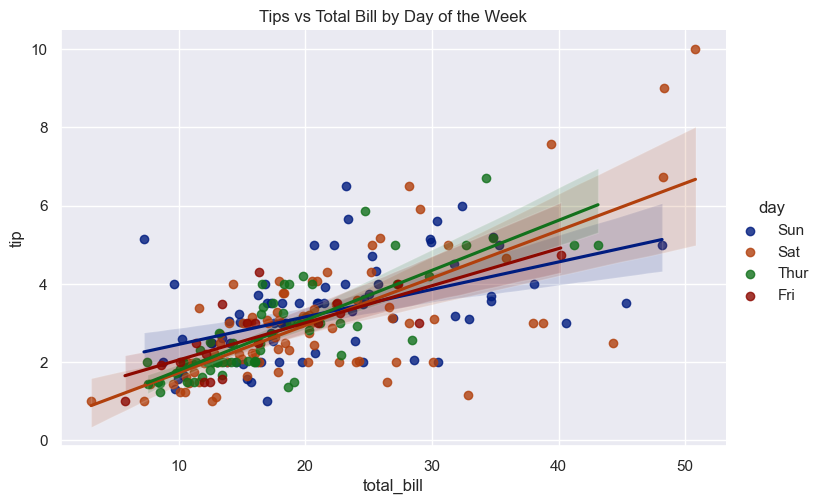

In [6]:
sns.set(style="darkgrid", palette="dark")
sns.lmplot(x="total_bill", y="tip", hue="day", data=data, aspect=1.5, markers='o', palette='dark')
plt.title('Tips vs Total Bill by Day of the Week')
plt.show()

# Step 03: Tips According to Total Bill, Number of People, and Gender

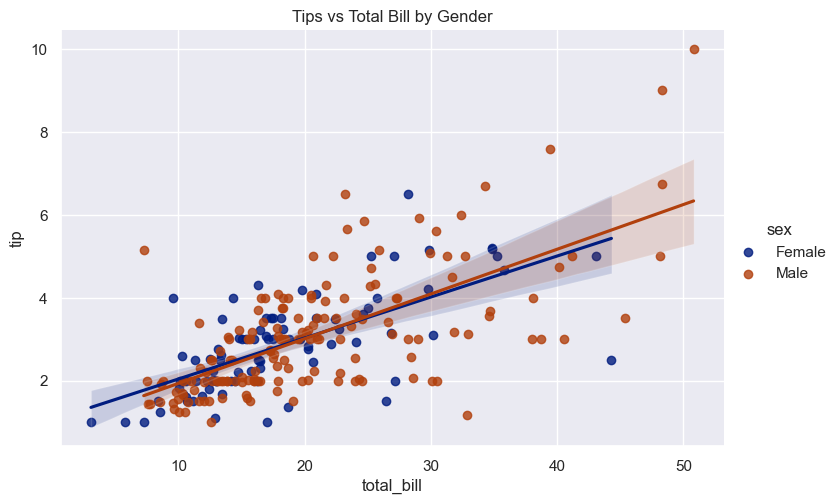

In [7]:
sns.set(style="darkgrid", palette="dark")
sns.lmplot(x="total_bill", y="tip", hue="sex", data=data, aspect=1.5, markers='o', palette='dark')
plt.title('Tips vs Total Bill by Gender')
plt.show()

# Step 04: Tips According to Total Bill, Number of People, and Time of the Meal

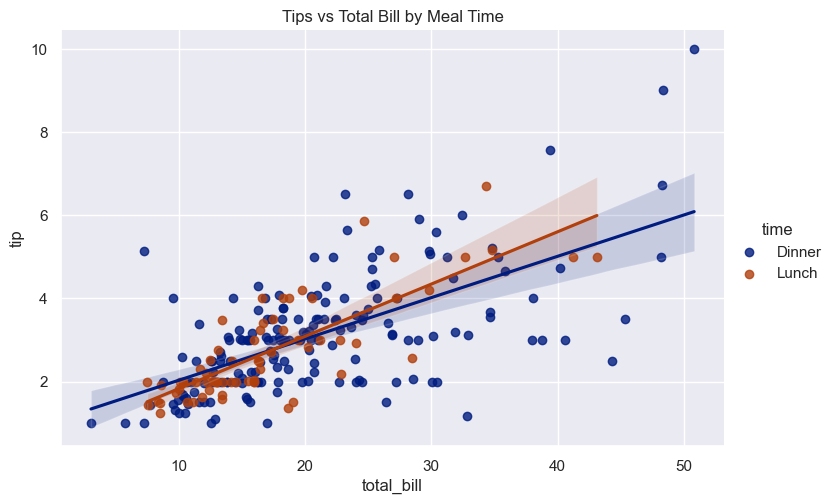

In [8]:
sns.set(style="darkgrid", palette="dark")
sns.lmplot(x="total_bill", y="tip", hue="time", data=data, aspect=1.5, markers='o', palette='dark')
plt.title('Tips vs Total Bill by Meal Time')
plt.show()

# Step 05: Percentage of Total Tips by Day of the Week

In [9]:
sns.set(style="darkgrid", palette="dark")

In [10]:
# Calculate the percentage of total tips by day of the week
total_tips_by_day = data.groupby('day')['tip'].sum().reset_index()
total_tips_by_day['percentage'] = (total_tips_by_day['tip'] / total_tips_by_day['tip'].sum()) * 100

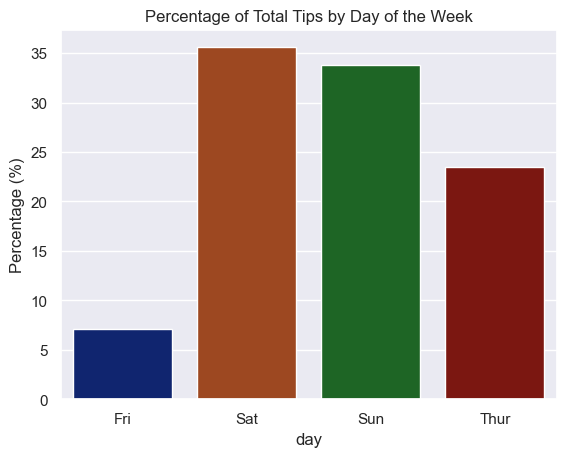

In [11]:
# Bar plot showing percentage of total tips by day of the week
sns.barplot(x="day", y="percentage", data=total_tips_by_day, palette='dark', edgecolor=None)
plt.title('Percentage of Total Tips by Day of the Week')
plt.ylabel('Percentage (%)')
plt.show()

# Step 06: Percentage of Total Tips by Gender

In [12]:
sns.set(style="darkgrid", palette="dark")

In [13]:
# Calculate the percentage of total tips by gender
total_tips_by_gender = data.groupby('sex')['tip'].sum().reset_index()
total_tips_by_gender['percentage'] = (total_tips_by_gender['tip'] / total_tips_by_gender['tip'].sum()) * 100

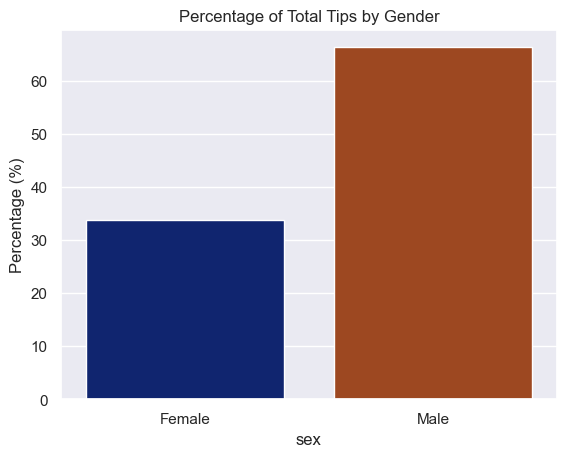

In [14]:
# Bar plot showing percentage of total tips by gender
sns.barplot(x="sex", y="percentage", data=total_tips_by_gender, palette='dark', edgecolor=None)
plt.title('Percentage of Total Tips by Gender')
plt.ylabel('Percentage (%)')
plt.show()

# Step 07: Percentage of Total Tips by Day of the Week (Repeated)

In [15]:
sns.set(style="darkgrid", palette="dark")

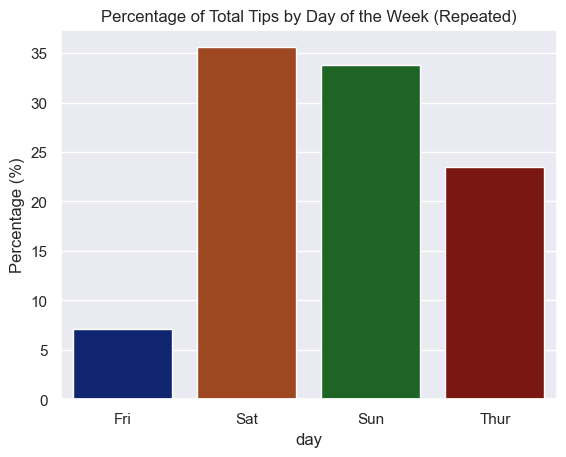

In [16]:
# Recalculate and plot the percentage of total tips by day of the week
sns.barplot(x="day", y="percentage", data=total_tips_by_day, palette='dark', edgecolor=None)
plt.title('Percentage of Total Tips by Day of the Week (Repeated)')
plt.ylabel('Percentage (%)')
plt.show()

# Step 08: Percentage of Total Tips by Smoking Status

In [17]:
sns.set(style="darkgrid", palette="dark")

In [18]:
# Calculate the percentage of total tips by smoking status
total_tips_by_smoker = data.groupby('smoker')['tip'].sum().reset_index()
total_tips_by_smoker['percentage'] = (total_tips_by_smoker['tip'] / total_tips_by_smoker['tip'].sum()) * 100

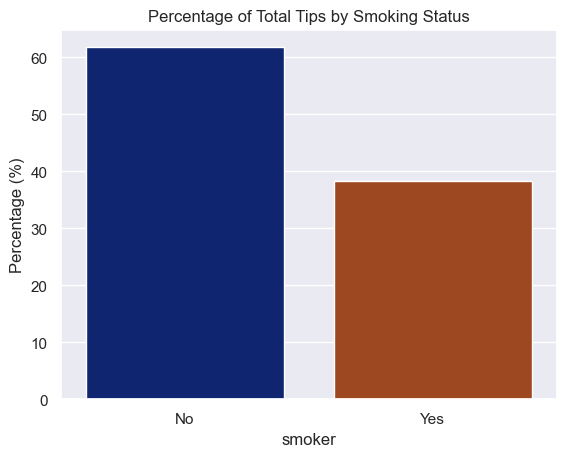

In [19]:
# Bar plot showing percentage of total tips by smoking status
sns.barplot(x="smoker", y="percentage", data=total_tips_by_smoker, palette='dark', edgecolor=None)
plt.title('Percentage of Total Tips by Smoking Status')
plt.ylabel('Percentage (%)')
plt.show()

# Step 09: Percentage of Total Tips by Meal Time

In [20]:
sns.set(style="darkgrid", palette="dark")

In [21]:
# Calculate the percentage of total tips by meal time
total_tips_by_time = data.groupby('time')['tip'].sum().reset_index()
total_tips_by_time['percentage'] = (total_tips_by_time['tip'] / total_tips_by_time['tip'].sum()) * 100

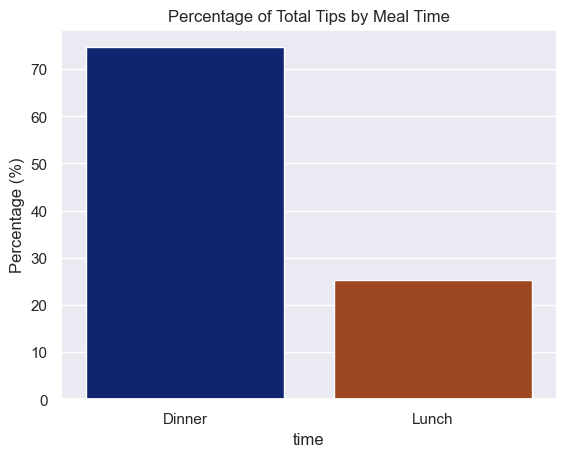

In [22]:
# Bar plot showing percentage of total tips by meal time
sns.barplot(x="time", y="percentage", data=total_tips_by_time, palette='dark', edgecolor=None)
plt.title('Percentage of Total Tips by Meal Time')
plt.ylabel('Percentage (%)')
plt.show()

# Step 10: Data Transformation for Machine Learning

In [23]:
# Transform categorical values into numerical values
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['day'] = le.fit_transform(data['day'])
data['time'] = le.fit_transform(data['time'])
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


# Step 11: Split Data and Train the Linear Regression Model

In [24]:
# Split data into training and test sets
X = data[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = data['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


# Step 12: Predict Tips and Check the Output

In [26]:
# Predict tips using the trained model
input_data = pd.DataFrame({'total_bill': [24.50], 'sex': [1], 'smoker': [0], 'day': [0], 'time': [1], 'size': [4]})
predicted_tip = model.predict(input_data)

print(f"Predicted Tip: {predicted_tip}")

Predicted Tip: [3.97416925]
